# Plots Comparing Different Policy Ranking Methods

In [1]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [27]:
grad_norm_correlation_loc = "data/grad_norm_ipw_spearman_corrs_16_06_2022.pkl"
snip_correlation_loc = "data/snip_spearman_corr_16_06_2022.pkl"
jacob_cov_correlation_loc = "data/jacob_cov_spearman_corr_16_06_2022.pkl"
synflow_correlation_loc = "data/synflow_spearman_corr_16_06_2022.pkl"

grad_norm_correlation_loc_30 = "data/grad_norm_ipw_spearman_corrs_03_07_2022.pkl"
snip_correlation_loc_30 = "data/snip_spearman_corr_07_07_2022.pkl"
jacob_cov_correlation_loc_30 = "data/jacob_cov_spearman_corr_12_07_2022.pkl"
synflow_correlation_loc_30 = "data/synflow_spearman_corr_11_07_2022.pkl"

ipw_correlation_loc_15 = "data/ipw_spearman_corrs_11_07_2022.pkl"
snipw_correlation_loc_15 = "data/snipw_spearman_corr_11_07_2022.pkl"
ipw_correlation_loc = "data/ipw_spearman_corrs_14_06_2022.pkl"
snipw_correlation_loc = "data/snipw_spearman_corr_14_06_2022.pkl"

ucb_correlation_1_0_loc = "data/ucb_corr_12_07_2022.pkl"

fqe_corr_loc_0 = "data/fqe_spearman_corr_12_07_2022.pkl"

with open(grad_norm_correlation_loc, "rb") as f:
    grad_norm_corr = pickle.load(f)

with open(snip_correlation_loc, "rb") as f:
    snip_corr = pickle.load(f)

with open(jacob_cov_correlation_loc, "rb") as f:
    jacob_cov_corr = pickle.load(f)

with open(synflow_correlation_loc, "rb") as f:
    synflow_corr = pickle.load(f)

with open(ipw_correlation_loc, "rb") as f:
    ipw_corr = pickle.load(f)

with open(snipw_correlation_loc, "rb") as f:
    snipw_corr = pickle.load(f)

with open(ipw_correlation_loc_15, "rb") as f:
    ipw_corr_15 = pickle.load(f)

with open(snipw_correlation_loc_15, "rb") as f:
    snipw_corr_15 = pickle.load(f)
    
with open(grad_norm_correlation_loc_30, "rb") as f:
    grad_norm_corr_30 = pickle.load(f)

with open(snip_correlation_loc_30, "rb") as f:
    snip_corr_30 = pickle.load(f)
    
with open(jacob_cov_correlation_loc_30, "rb") as f:
    jacob_cov_corr_30 = pickle.load(f)

with open(synflow_correlation_loc_30, "rb") as f:
    synflow_corr_30 = pickle.load(f)
    
with open(ucb_correlation_1_0_loc, "rb") as f:
    ucb_corr_1_0 = pickle.load(f)
    
with open(fqe_corr_loc_0, "rb") as f:
    fqe_corr_0 = pickle.load(f)

## Spearman Correlation Across all Zones

In [28]:
grad_norm_abs = [abs(val.correlation) for val in grad_norm_corr.values()]
snip_abs = [abs(val.correlation) for val in snip_corr.values()]
jacob_cov_abs = [abs(val.correlation) for val in jacob_cov_corr.values()]
synflow_abs = [abs(val.correlation) for val in synflow_corr.values()]

grad_norm_abs_30 = [abs(val.correlation) for val in grad_norm_corr_30.values()]
snip_abs_30 = [abs(val.correlation) for val in snip_corr_30.values()]
jacob_cov_abs_30 = [abs(val.correlation) for val in jacob_cov_corr_30.values()]
synflow_abs_30 = [abs(val.correlation) for val in synflow_corr_30.values()]

ipw_abs = [abs(val.correlation) for val in ipw_corr.values()]
snipw_abs = [abs(val.correlation) for val in snipw_corr.values()]

ipw_abs_15 = [abs(val.correlation) for val in ipw_corr_15.values()]
snipw_abs_15 = [abs(val.correlation) for val in snipw_corr_15.values()]

ucb_abs_1_0 = [abs(val.correlation) for val in ucb_corr_1_0.values()]

fqe_abs_0 = [abs(val.correlation) for val in fqe_corr_0.values()]


grad_norm_df = pd.DataFrame()
grad_norm_df["method"] = ["ZCP: Grad-Norm (15)" for i in range(len(grad_norm_abs))]
grad_norm_df["correlation"] = grad_norm_abs

snip_df = pd.DataFrame()
snip_df["method"] = ["ZCP: SNIP (15)" for i in range(len(snip_abs))]
snip_df["correlation"] = snip_abs

jacob_cov_df = pd.DataFrame()
jacob_cov_df["method"] = ["ZCP: Jacob-Cov (15)" for i in range(len(jacob_cov_abs))]
jacob_cov_df["correlation"] = jacob_cov_abs

synflow_df = pd.DataFrame()
synflow_df["method"] = ["ZCP: Synflow (15)" for i in range(len(synflow_abs))]
synflow_df["correlation"] = synflow_abs

grad_norm_df_30 = pd.DataFrame()
grad_norm_df_30["method"] = ["ZCP: Grad-Norm (30)" for i in range(len(grad_norm_abs_30))]
grad_norm_df_30["correlation"] = grad_norm_abs_30

snip_df_30 = pd.DataFrame()
snip_df_30["method"] = ["ZCP: SNIP (30)" for i in range(len(snip_abs_30))]
snip_df_30["correlation"] = snip_abs_30

jacob_cov_df_30 = pd.DataFrame()
jacob_cov_df_30["method"] = ["NAS: Jacob-Cov (30)" for i in range(len(jacob_cov_abs_30))]
jacob_cov_df_30["correlation"] = jacob_cov_abs_30

synflow_df_30 = pd.DataFrame()
synflow_df_30["method"] = ["ZCP: Synflow (30)" for i in range(len(synflow_abs_30))]
synflow_df_30["correlation"] = synflow_abs_30

ipw_df = pd.DataFrame()
ipw_df["method"] = ["OPE: IPW (30)" for i in range(len(ipw_abs))]
ipw_df["correlation"] = ipw_abs

snipw_df = pd.DataFrame()
snipw_df["method"] = ["OPE: SNIPW (30)" for i in range(len(snipw_abs))]
snipw_df["correlation"] = snipw_abs

ipw_df_15 = pd.DataFrame()
ipw_df_15["method"] = ["OPE: IPW (15)" for i in range(len(ipw_abs_15))]
ipw_df_15["correlation"] = ipw_abs_15

snipw_df_15 = pd.DataFrame()
snipw_df_15["method"] = ["OPE: SNIPW (15)" for i in range(len(snipw_abs_15))]
snipw_df_15["correlation"] = snipw_abs_15

ucb_df_0_1 = pd.DataFrame()
ucb_df_0_1["method"] = ["UCB: (1)" for i in range(len(ucb_abs_1_0))]
ucb_df_0_1["correlation"] = ucb_abs_1_0

fqe_df_0 = pd.DataFrame()
fqe_df_0["method"] = ["OPE: FQE (30)" for i in range(len(fqe_abs_0))]
fqe_df_0["correlation"] = fqe_abs_0

boxplot_df = pd.concat([grad_norm_df, grad_norm_df_30, snip_df,
                        snip_df_30, jacob_cov_df, jacob_cov_df_30,
                        synflow_df, synflow_df_30,
                        ipw_df_15, ipw_df,
                        snipw_df_15, snipw_df, fqe_df_0,
                        ucb_df_0_1])

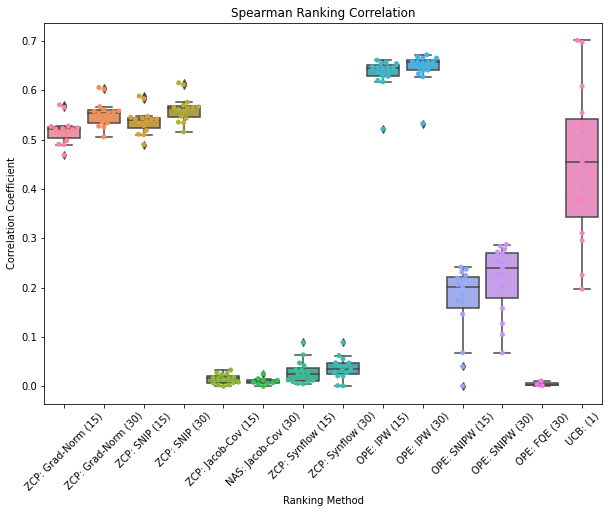

In [29]:
plt.figure(figsize=(10, 7))
plt.title("Spearman Ranking Correlation")
sns.boxplot(x="method", y="correlation", data=boxplot_df)
sns.swarmplot(x="method", y="correlation", data=boxplot_df)
plt.xlabel("Ranking Method")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.savefig("plots/spearman_corr_boxplot_12_07_2022.png", dpi=300, bbox_inches="tight")